# Interstate traffic analysis

In this analysis we will try to determine the indicators of heavy traffic on the I-94 interstate highway. The type of indicators might be weather, time of the day,day of the week, etc.
As an example, we might find that traffic is heavier in the summer than when it snows.
The dataset has been made available by John Hogue and can be downloaded from [here.](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume)
It is important to notice that the station that recorded this data, only recorded traffic going westbound i.e moving from east to west.

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

traffic=pd.read_csv('Metro_Interstate_Traffic_Volume.csv')



To get a better idea of what the dataset looks like we print the first and last rows and use DataFrame.info() to know what datatypes are included in the file.

In [53]:
traffic.head(5)


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [54]:
traffic.tail(5)


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [55]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


We can see that there are 48204 rows and 9 columns. There are no null values.

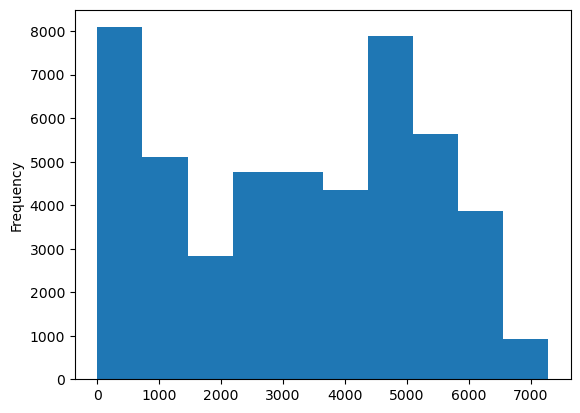

In [56]:
traffic['traffic_volume'].plot.hist()
plt.show()

In [57]:
traffic.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,281.205870,0.334264,0.000222,49.362231,3259.818355
std,13.338232,44.789133,0.008168,39.015750,1986.860670
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1.000000,1193.000000
50%,282.450000,0.000000,0.000000,64.000000,3380.000000
75%,291.806000,0.000000,0.000000,90.000000,4933.000000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000


The average hourly traffic recorded is 3259.8 vehicles, the maximum is 7280 and the minimum is 0. 25% of the time there were at most 1193 cars passing the station per hour. Still 25% of the time there were more that 4933 or more cars passing by.

In [58]:
traffic['date_time']=pd.to_datetime(traffic['date_time'])

daytime=traffic.copy()[traffic['date_time'].dt.hour.between(7,19,inclusive='left')]
nighttime=traffic.copy()[(traffic['date_time'].dt.hour >= 19) | (traffic['date_time'].dt.hour < 7)]

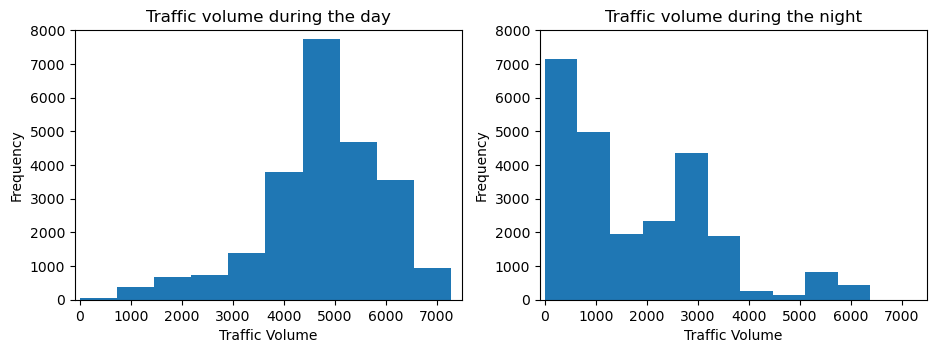

In [59]:
plt.figure(figsize=(11,3.5))

plt.subplot(1,2,1)
plt.hist(daytime['traffic_volume'])
plt.title('Traffic volume during the day')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.xlim(-100,7500)
plt.ylim(0,8000)


plt.subplot(1,2,2)
plt.hist(nighttime['traffic_volume'])
plt.title('Traffic volume during the night')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.xlim(-100,7500)
plt.ylim(0,8000)
plt.show()


In [60]:
daytime.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,23877.000000,23877.00000,23877.000000,23877.000000,23877.000000
mean,282.257596,0.53306,0.000253,53.122000,4762.047452
std,13.298885,63.62932,0.008853,37.564588,1174.546482
min,0.000000,0.00000,0.000000,0.000000,0.000000
25%,272.680000,0.00000,0.000000,5.000000,4252.000000
50%,283.780000,0.00000,0.000000,75.000000,4820.000000
75%,293.440000,0.00000,0.000000,90.000000,5559.000000
max,310.070000,9831.30000,0.510000,100.000000,7280.000000


In [61]:
nighttime.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,24327.000000,24327.000000,24327.000000,24327.000000,24327.000000
mean,280.173600,0.139145,0.000192,45.672011,1785.377441
std,13.296357,1.110872,0.007434,40.048382,1441.951197
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,271.700000,0.000000,0.000000,1.000000,530.000000
50%,281.379000,0.000000,0.000000,40.000000,1287.000000
75%,290.700000,0.000000,0.000000,90.000000,2819.000000
max,307.680000,55.630000,0.510000,100.000000,6386.000000


The daytime histogram is left skewed and the nighttime histogram is right skewed. From this graphs we can conclude that more people travel in this direction during the day than during the night. On average 4762 cars travel in this direction during the day, while only 1785 on average during the night.
Although there are still measurements of over 5,000 cars per hour, the traffic at night is generally light. Our goal is to find indicators of heavy traffic, so we'll only focus on the daytime data moving forward.

In [62]:
daytime['month'] = daytime['date_time'].dt.month
by_month = daytime.groupby('month').mean()
by_month['traffic_volume']

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

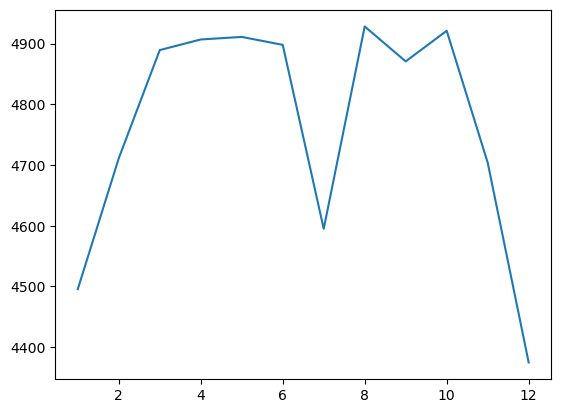

In [66]:
plt.plot(by_month['traffic_volume'])


The traffic is in general heavier in the warmer months(3-8) with the exception of July. The traffic starts to decrease in October and is the lowest in December. 

In [68]:
daytime['dayofweek']=daytime['date_time'].dt.dayofweek
by_weekday=daytime.groupby('dayofweek').mean()
by_weekday['traffic_volume']
#0 is Monday and 6 is Sunday



dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

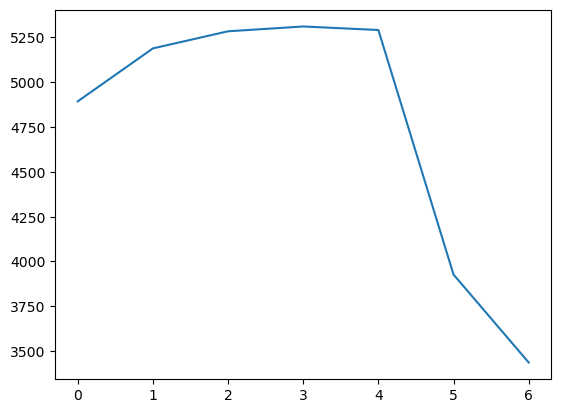

In [69]:
plt.plot(by_weekday['traffic_volume'])

There is a big drop on traffic starting ar Friday. This is a strong indicator that most of the traffic is caused by people driving to work.

In [72]:
daytime['hour'] = daytime['date_time'].dt.hour
bussiness_days = daytime.copy()[daytime['dayofweek'] <= 4] # 4 == Friday
weekend = daytime.copy()[daytime['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


(1000.0, 8000.0)

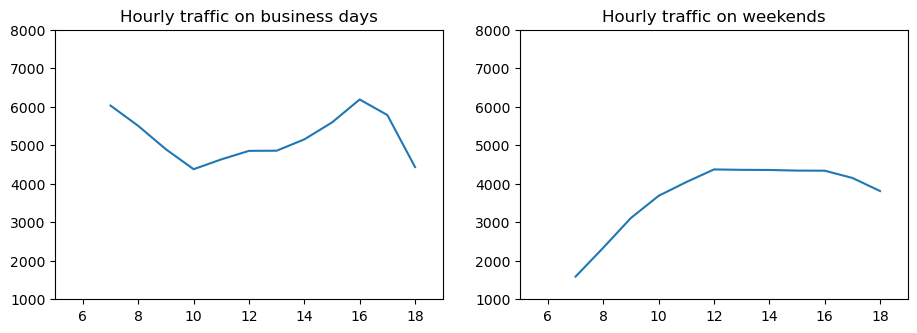

In [80]:
plt.figure(figsize=(11,3.5))

plt.subplot(1,2,1)
plt.plot(by_hour_business['traffic_volume'])
plt.title('Hourly traffic on business days')
plt.xlim(5,19)
plt.ylim(1000,8000)


plt.subplot(1,2,2)
plt.plot(by_hour_weekend['traffic_volume'])
plt.title('Hourly traffic on weekends')
plt.xlim(5,19)
plt.ylim(1000,8000)

We can clearly identify the rush hours, 7 and 16-17. Traffic is in general higher on weekdays. On the weekend is traffic relatively low early in the morning and peaks at around 11, the may indicate that people are going on daytrips or for lunch somewhere special.

Summarizing:
- The traffic is heavier in warm months (March-August) compared to the colder months (November-February)
- On average there is more traffic on weekdays than on weekends
- On weekdays the traffic peaks at around 7 and 16-17 (rush hours).

In [86]:
traffic.corr()[['temp','rain_1h','snow_1h','clouds_all','traffic_volume']]

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
temp,1.000000,0.009069,-0.019755,-0.101976,0.130299
rain_1h,0.009069,1.000000,-0.000090,0.004818,0.004714
snow_1h,-0.019755,-0.000090,1.000000,0.027931,0.000733
clouds_all,-0.101976,0.004818,0.027931,1.000000,0.067054
traffic_volume,0.130299,0.004714,0.000733,0.067054,1.000000


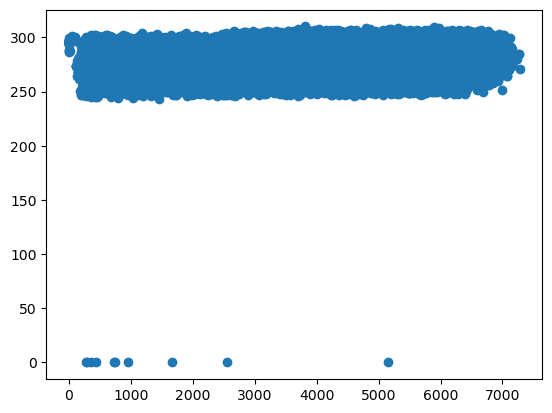

In [92]:
plt.scatter(x=traffic['traffic_volume'],y=traffic['temp'])

This doesn't seem like a good indicator. Lets check the other two that are non numerical.

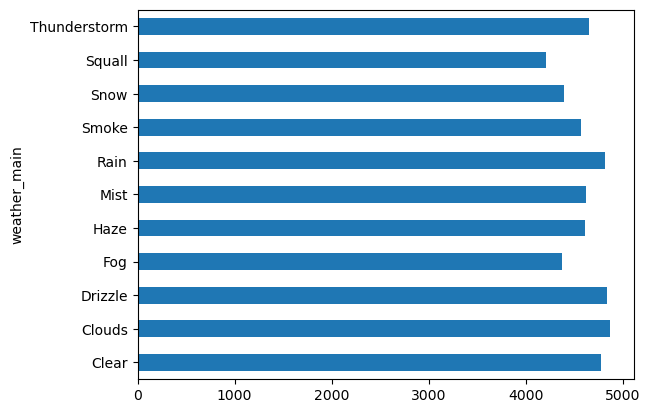

In [94]:
by_weather_main=daytime.groupby('weather_main').mean()
by_weather_main['traffic_volume'].plot.barh()
plt.show()

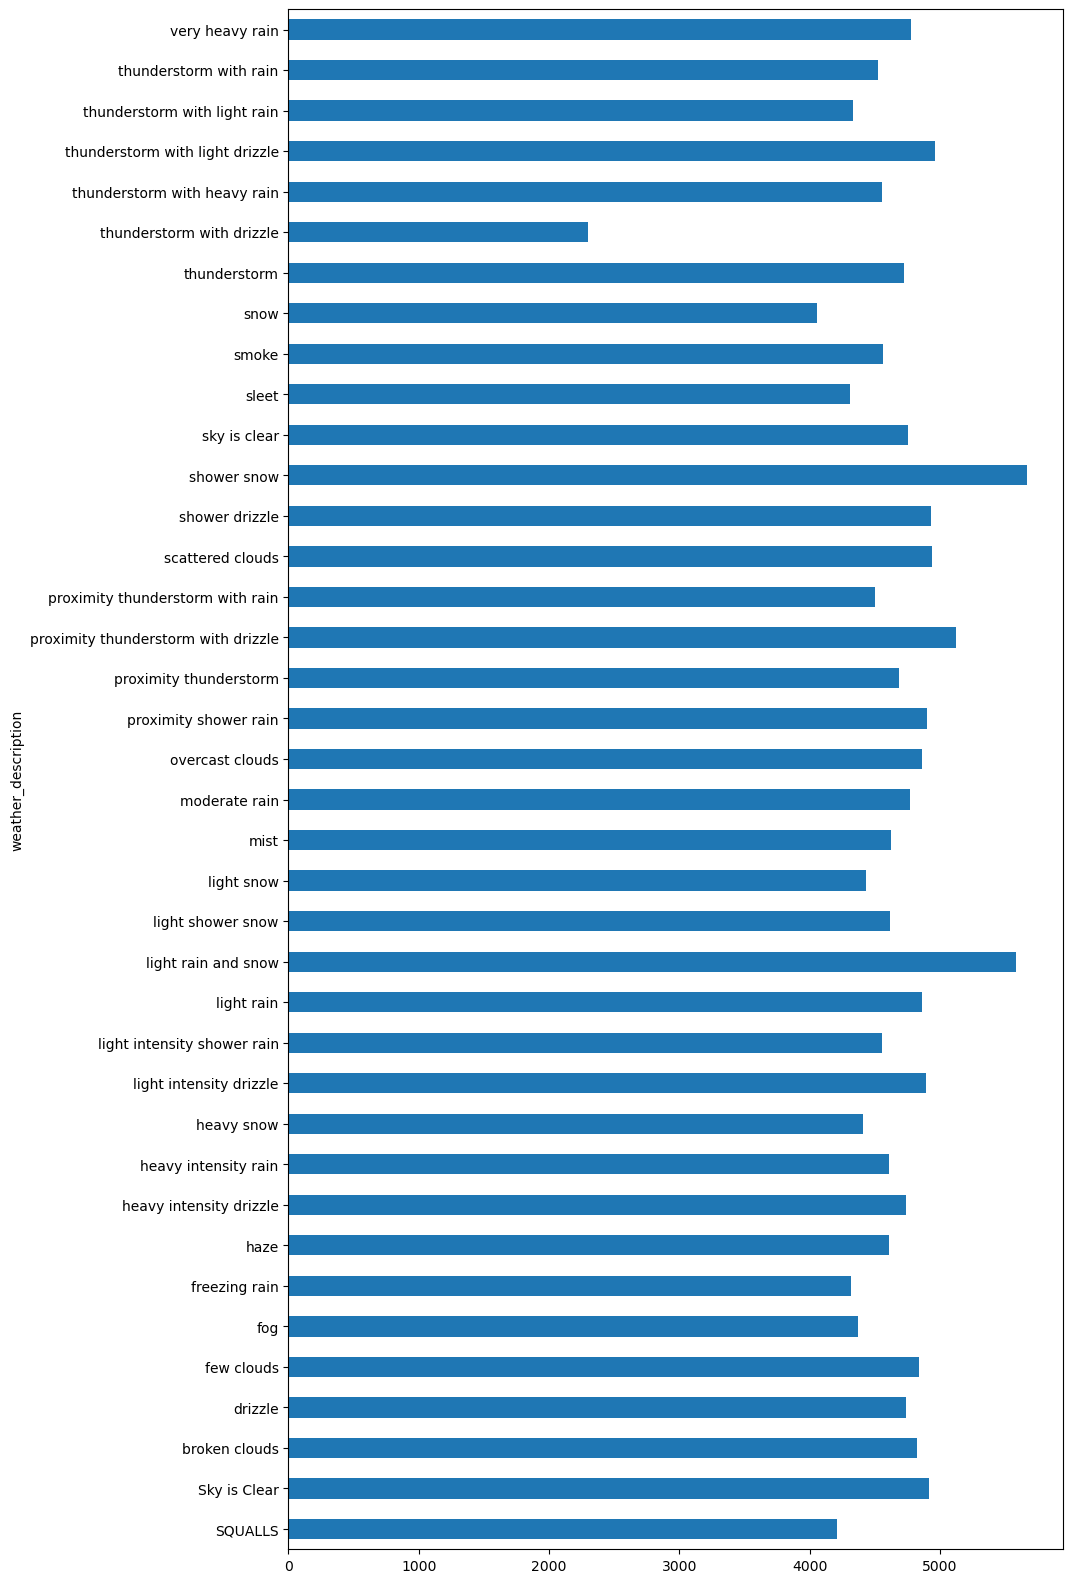

In [100]:
by_weather_description=daytime.groupby('weather_description').mean()
by_weather_description['traffic_volume'].plot.barh(figsize=(10,20))

plt.show()

Neither `weather_main` nor `weather_description` seem to be a good candidate for an indicator. We can see that some values stand out a bit (light rain and snow,shower snow,proximity thunderstorm with drizzle) but there is no clear pattern.

# Conclusion
We tried to find the best indicators of heavy traffic on the I-94 Interstate highway. The two best candidates are:

- Time indicators:
    - Traffic is heavier between March and August
    - Traffic is heavier during weekdays
    - On business days the rush hours are around 7 and 16
- Weather indicators:
    - light rain and snow
    - Shower snow
    - Proximity thunderstorm with drizzle